TO DO:

1. Create new combined hdf5 file with TRAIN/TEST groups with attributes attached to each galaxy group (save in ceph, not home)
2. Create pytorch dataset class to index the hdf file and return (x, y) samples
3. Create pytorch dataloaders for train/val/test in <code> /mnt/home/dmohan/dreams-dm/dreamsdm/datamodules.py </code>





In [ ]:
import h5py
from pathlib import Path
import pandas as pd
import os
import numpy as np
from pathlib import Path
import torch
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader



create new hdf5 file

pseudo code for writing hdf files 

creating groups for train/test

```python
with h5py.File(new_file_path, 'w') as hdf:
    train_group = hdf.create_group('Train')train_group = hdf.create_group('Train')train_group = hdf.create_group('Train')
    train_group.create_dataset('for Galaxy0 to Galaxy800', data = 'for Mgas0 to Mgas342' )
    #set attributes

    test_group = hdf.create_group('Test')
    test_group.create_dataset('for Galaxy 800 to 1024', data = 'for Mgas0 to Mgas342')

    #all datasets (Mgas0 to Mgas342) have the same arrtibutes for a particular simulation
    dataset.attrs['WDM'] = wdm_mass 
    dataset.attrs['AGN'] = agn
    dataset.attrs['SN1/SN2'] = sn1
```

In [3]:
file_path = '/mnt/ceph/users/fvillaescusa/DREAMS/Software/zoom_images/'
new_file_path = '/mnt/ceph/users/dmohan/dreams/data/dreams/mwzooms_test.hdf5'
# new_file_path = '/mnt/ceph/users/dmohan/dreams/data/dreams/mwzooms.hdf5'
df = pd.read_csv('/mnt/home/dmohan/dreams-dm/dreamsdm/data/wdm/labels.csv')
labels = df

By default, objects inside group are iterated in alphanumeric order. However, if group is created with track_order=True, the insertion order for the group is remembered (tracked) in HDF5 file, and group contents are iterated in that order.

In [4]:

with h5py.File(new_file_path, "w") as hdf:
    
    train_group = hdf.create_group('Train')
    for idx in range(0, 10): #0 to 700
        simid = labels.iloc[idx,0]
        galaxy_path = os.path.join(file_path, simid)
        galaxy_file = h5py.File(galaxy_path+'.hdf5', 'r')    
        sim_group = train_group.create_group(simid)
        sim_group.attrs["WDM"] = labels.iloc[idx,1]
        sim_group.attrs["SN1"] = labels.iloc[idx,2]
        sim_group.attrs["SN2"] = labels.iloc[idx,3]
        sim_group.attrs["AGN"] = labels.iloc[idx,4]

        for i in range(0, 2): #0 to 343
            mgas = 'Mgas_'+str(i)
            image = np.array(galaxy_file[mgas])
            dataset = sim_group.create_dataset(mgas, data = image )
            # dataset.attrs["WDM"] = labels.iloc[idx,1]
            # dataset.attrs["SN1"] = labels.iloc[idx,2]
            # dataset.attrs["SN2"] = labels.iloc[idx,3]
            # dataset.attrs["AGN"] = labels.iloc[idx,4]

    val_group = hdf.create_group('Val')
    for idx in range(700, 710): #700 to 800
        simid = labels.iloc[idx,0]
        galaxy_path = os.path.join(file_path, simid)
        galaxy_file = h5py.File(galaxy_path+'.hdf5', 'r')    
        sim_group = val_group.create_group(simid)
        sim_group.attrs["WDM"] = labels.iloc[idx,1]
        sim_group.attrs["SN1"] = labels.iloc[idx,2]
        sim_group.attrs["SN2"] = labels.iloc[idx,3]
        sim_group.attrs["AGN"] = labels.iloc[idx,4]

        for i in range(0, 2): #0 to 343
            mgas = 'Mgas_'+str(i)
            image = np.array(galaxy_file[mgas])
            dataset = sim_group.create_dataset(mgas, data = image )
            # dataset.attrs["WDM"] = labels.iloc[idx,1]
            # dataset.attrs["SN1"] = labels.iloc[idx,2]
            # dataset.attrs["SN2"] = labels.iloc[idx,3]
            # dataset.attrs["AGN"] = labels.iloc[idx,4]


    test_group = hdf.create_group('Test')

    for idx in range(800, 810): #800 to 1024
        if(idx not in [864, 874, 884, 894, 904, 914, 924, 934, 944, 954, 964, 974, 984, 994, 1004, 1014]):
            simid = labels.iloc[idx,0]
            galaxy_path = os.path.join(file_path, simid)
            galaxy_file = h5py.File(galaxy_path+'.hdf5', 'r')   
            sim_group = test_group.create_group(simid)
            sim_group.attrs["WDM"] = labels.iloc[idx,1]
            sim_group.attrs["SN1"] = labels.iloc[idx,2]
            sim_group.attrs["SN2"] = labels.iloc[idx,3]
            sim_group.attrs["AGN"] = labels.iloc[idx,4]
            
            for i in range(0, 2):
                mgas = 'Mgas_'+str(i)
                image = np.array(galaxy_file[mgas])
                dataset = sim_group.create_dataset(mgas, data = image )
                # dataset.attrs["WDM"] = labels.iloc[idx,1]
                # dataset.attrs["SN1"] = labels.iloc[idx,2]
                # dataset.attrs["SN2"] = labels.iloc[idx,3]
                # dataset.attrs["AGN"] = labels.iloc[idx,4]
hdf.close()


In [4]:
# with h5py.File(new_file_path, "r") as hdf:
#     ls = list(hdf.keys())
#     print("Keys in hdf file", ls)
    
#     print("List of keys in Group 'Train' ", list(hdf['Train'].keys()))
#     print("List of keys in Group Galaxy_0 of Group Train", list(hdf['Train']['Galaxy_0'].keys()))
#     data = hdf['Train']['Galaxy_0']['Mgas_0'] #.get('Mgas_0')
#     print(data)
#     print("Numpy array of ['Train']['Galaxy_0']['Mgas_0']", np.array(data))
#     print("WDM attribute of MGas_0 of Galaxy_0", hdf['Train']['Galaxy_0']['Mgas_0'] .attrs["WDM"])

#     print(list(hdf['Test'].keys()))
#     print(list(hdf['Test']['Galaxy_800'].keys()))
#     data = hdf['Test']['Galaxy_800'].get('Mgas_0')
#     print(data)
#     print(hdf['Test']['Galaxy_800']['Mgas_0'].attrs["WDM"])

In [5]:
# csv_file = "/mnt/home/dmohan/dreams-dm/dreamsdm/data/wdm/labels.csv"
img_dir =  "/mnt/ceph/users/dmohan/dreams/data/dreams/mwzooms_test.hdf5"
# img_dir =  "/mnt/ceph/users/dmohan/dreams/data/dreams/mwzooms.hdf5"
# wdm_gal_dataset = WDMGalaxiesDataset(csv_file, img_dir)

Make a dictionary during dataset initialisation which contains the following keys 
to access a particular image:


[Group 1][Group 2][Dataset1]

[Train/Test][Sim_ID][Mgas_ID]



In [6]:
# dataset_name = 'Train'
# _idx_to_name = {}
# # classes = {}
# with h5py.File(img_dir, 'r') as hf:
#     for gname, group in hf.items():
#         print("Group name:", gname)

#         if gname == dataset_name:
#             sample_id_idx = 0

#             print("Dataset name", dataset_name)
#             length = len(group)

#             #number of simulations
#             print("Length of this group/no. of sims in this group", length)
#             # print("Sims", group.get())

#             for sim_id, dd in (group.items()):
#                 #simulation ID and group 
#                 print("sim_id, dd", sim_id, dd)

#                 for Mgas_id, ee in enumerate(dd.items()):
#                     #Mgas_ID, Dataset 
#                     print("Mgas_idx, ee = (Mgas_ID, dataset)", Mgas_id , ee)

#                     #also this cant be Mgas_id - should be data sample id 
#                     # _idx_to_name[Mgas_id] = ee[0]
#                     _idx_to_name[sample_id_idx] = [sim_id, ee[0]]
#                     print("idk to name:", _idx_to_name)

#                     print(hf[gname][sim_id][ee[0]])
#                     # print(np.array(hf[gname][sim_id][ee[0]]))

#                     # this is also not needed here, can access attributes of dataset later 
#                     #get attribute of dataset
#                     wdm_mass = ee[1].attrs['WDM']
#                     print("wdm_mass", wdm_mass)

#                     sample_id_idx+=1 
                    
                
# print(sample_id_idx)
# print(_idx_to_name)          



In [7]:

# idx = 0
# sim_id, Mgas_id = _idx_to_name[idx]
# print(sim_id, Mgas_id)
# transform = ToTensor()
# with h5py.File(img_dir, 'r') as hf:
#     data = hf['Train'][sim_id][Mgas_id]
#     image = np.array(data)
#     image = transform(image)
#     label = data.attrs['WDM']
#     # print(image, label)

In [6]:


class WDMGalaxiesDataset(Dataset):
    """
    file_path: path to hdf file
    dataset_name: specify train or test datasets
    transform, target_transforms: optional transforms
    """
    
    def __init__(self, file_path, dataset_name, transform = None,
                 target_transform = None):
        self.file_path = file_path
        self.dataset_name = dataset_name
        self.transform = transform 
        self.target_transform = target_transform
        self.length = None
        self._idx_to_name = {} #data_dict 

        with h5py.File(self.file_path, 'r') as hf:
            for gname, group in hf.items():
                if gname == self.dataset_name:
                    sample_id_idx = 0
                    for sim_id, dd in (group.items()):
                        for Mgas_id, ee in enumerate(dd.items()):
                            self._idx_to_name[sample_id_idx] = [sim_id, ee[0]]
                            sample_id_idx+=1 
                    self.length = sample_id_idx
        print(self._idx_to_name)

    def __len__(self):
        assert self.length is not None
        return self.length
    
    def _open_hdf5(self):
        self._hf = h5py.File(self.file_path, 'r')

    def __getitem__(self, idx):
        # if (torch.is_tensor(idx)):
        #     idx = idx.tolist()
        if not hasattr(self, '_hf'):
            self._open_hdf5()

        sim_id, Mgas_id = self._idx_to_name[idx]
        data = self._hf[self.dataset_name][sim_id][Mgas_id]
        image = np.array(data)
        # label = torch.tensor(data.attrs['WDM'])
        label = torch.tensor(self._hf[self.dataset_name][sim_id].attrs['WDM'])

        if self.transform:
            image = self.transform(image)

        # if self.target_transform:
            # label = self.target_transform(label)

        return image, label




In [7]:
trainset = WDMGalaxiesDataset(img_dir, 'Train', ToTensor()) 
valset = WDMGalaxiesDataset(img_dir, 'Val', ToTensor())
testset = WDMGalaxiesDataset(img_dir, 'Test', ToTensor())

{0: ['Galaxy_0', 'Mgas_0'], 1: ['Galaxy_0', 'Mgas_1'], 2: ['Galaxy_1', 'Mgas_0'], 3: ['Galaxy_1', 'Mgas_1'], 4: ['Galaxy_2', 'Mgas_0'], 5: ['Galaxy_2', 'Mgas_1'], 6: ['Galaxy_3', 'Mgas_0'], 7: ['Galaxy_3', 'Mgas_1'], 8: ['Galaxy_4', 'Mgas_0'], 9: ['Galaxy_4', 'Mgas_1'], 10: ['Galaxy_5', 'Mgas_0'], 11: ['Galaxy_5', 'Mgas_1'], 12: ['Galaxy_6', 'Mgas_0'], 13: ['Galaxy_6', 'Mgas_1'], 14: ['Galaxy_7', 'Mgas_0'], 15: ['Galaxy_7', 'Mgas_1'], 16: ['Galaxy_8', 'Mgas_0'], 17: ['Galaxy_8', 'Mgas_1'], 18: ['Galaxy_9', 'Mgas_0'], 19: ['Galaxy_9', 'Mgas_1']}
{0: ['Galaxy_700', 'Mgas_0'], 1: ['Galaxy_700', 'Mgas_1'], 2: ['Galaxy_701', 'Mgas_0'], 3: ['Galaxy_701', 'Mgas_1'], 4: ['Galaxy_702', 'Mgas_0'], 5: ['Galaxy_702', 'Mgas_1'], 6: ['Galaxy_703', 'Mgas_0'], 7: ['Galaxy_703', 'Mgas_1'], 8: ['Galaxy_704', 'Mgas_0'], 9: ['Galaxy_704', 'Mgas_1'], 10: ['Galaxy_705', 'Mgas_0'], 11: ['Galaxy_705', 'Mgas_1'], 12: ['Galaxy_706', 'Mgas_0'], 13: ['Galaxy_706', 'Mgas_1'], 14: ['Galaxy_707', 'Mgas_0'], 15: ['Ga

In [8]:

print(len(trainset))
print(len(valset))
print(len(testset))

20
20
20


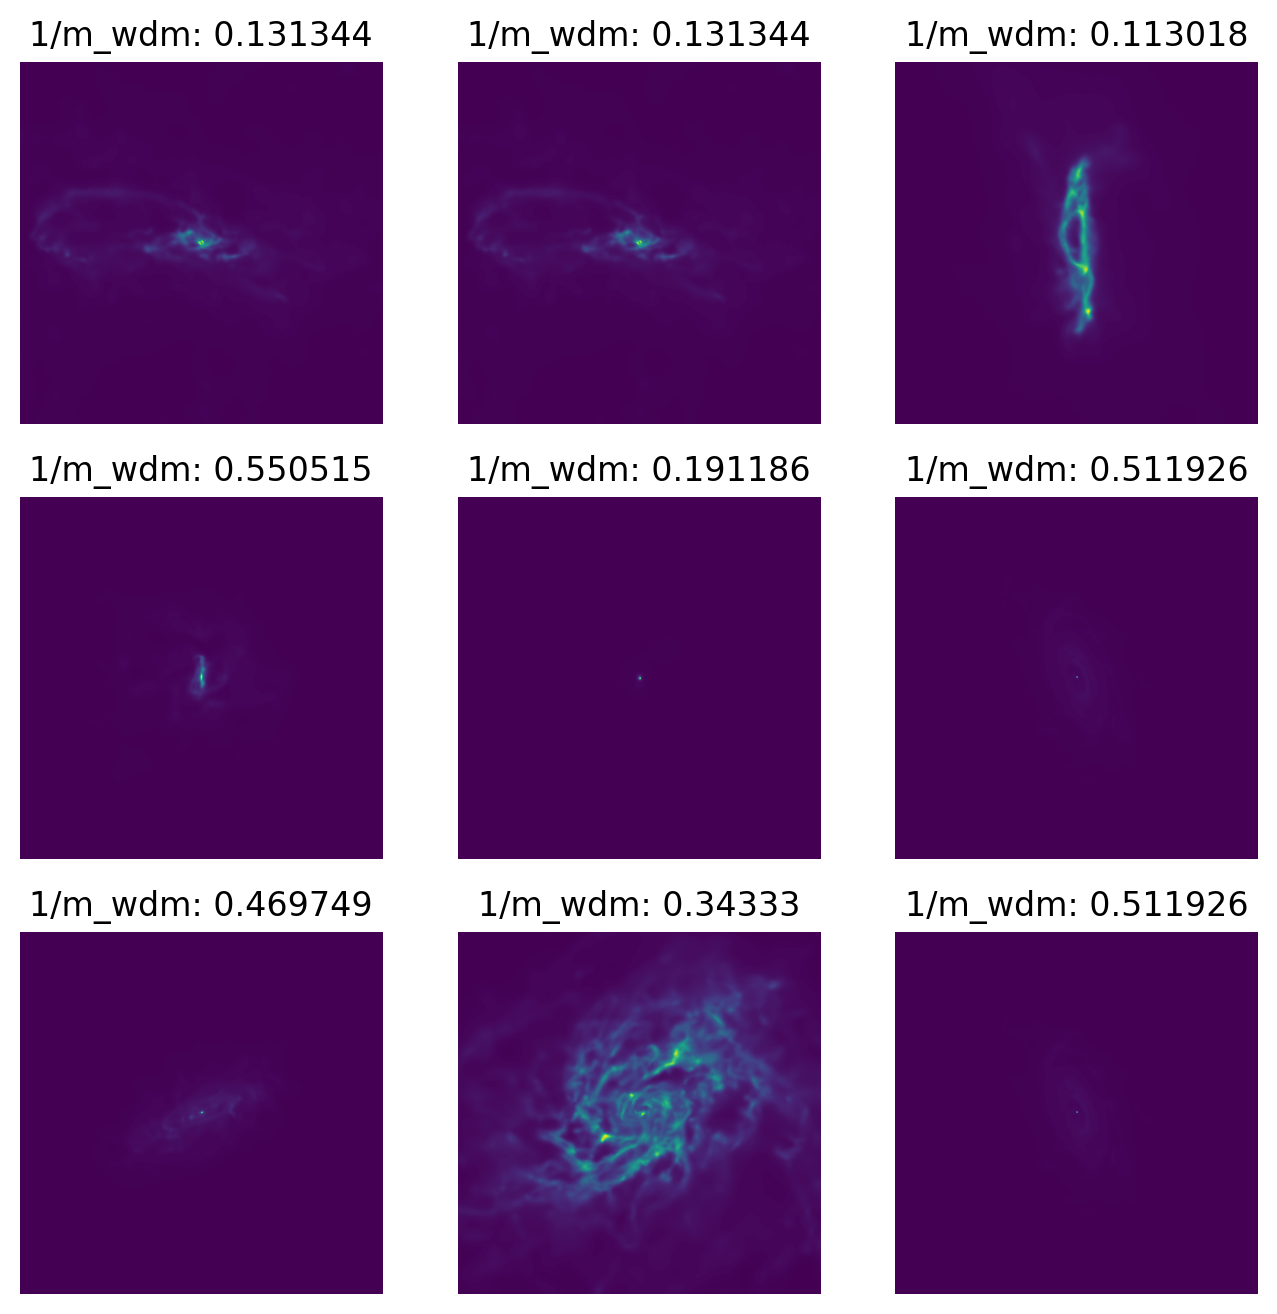

In [9]:
from matplotlib import pyplot as plt

figure = plt.figure(figsize=(8, 8), dpi = 200)
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(f"1/m_wdm: {label}")
    plt.imshow(img.squeeze())
    plt.axis("off")

In [10]:
train_dataloader = DataLoader(trainset, batch_size=32, shuffle=True, num_workers = 1)
val_dataloader = DataLoader(valset, batch_size=32, shuffle=True, num_workers = 1)
test_dataloader = DataLoader(testset, batch_size=32, shuffle=True, num_workers = 1)

In [11]:
# train_features, train_labels = next(iter(train_dataloader))
# print(f"Feature batch shape: {train_features.size()}")
# print(f"Labels batch shape: {train_labels.size()}")
# img = train_features[0].squeeze()
# label = train_labels[0]
# plt.imshow(img)
# plt.show()
# print(f"Label: {label}")

In [17]:
from torchvision import transforms

def calc_mu_sigma(dataloader):
    num_pixels =  0
    mu = 0.0
    sigma = 0.0
    for images, _ in dataloader:
        batch_size, num_channels, height, width = images.shape[0], images.shape[1], images.shape[2], images.shape[3]
        num_pixels+= batch_size * height * width
        mu+= images.mean(axis=(0, 2, 3)).sum()
        sigma+= images.std(axis=(0, 2, 3)).sum()

    mu/= num_pixels
    sigma/= num_pixels

    return mu, sigma

In [18]:
mu, sigma = calc_mu_sigma(train_dataloader)     

In [19]:
print(mu, sigma)

tensor(498244.) tensor(1235061.2500)


In [20]:
transforms = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean = mu, std = sigma)])

In [21]:
trainset = WDMGalaxiesDataset(img_dir, 'Train', transforms) 
valset = WDMGalaxiesDataset(img_dir, 'Val', ToTensor())
testset = WDMGalaxiesDataset(img_dir, 'Test', ToTensor())

{0: ['Galaxy_0', 'Mgas_0'], 1: ['Galaxy_0', 'Mgas_1'], 2: ['Galaxy_1', 'Mgas_0'], 3: ['Galaxy_1', 'Mgas_1'], 4: ['Galaxy_2', 'Mgas_0'], 5: ['Galaxy_2', 'Mgas_1'], 6: ['Galaxy_3', 'Mgas_0'], 7: ['Galaxy_3', 'Mgas_1'], 8: ['Galaxy_4', 'Mgas_0'], 9: ['Galaxy_4', 'Mgas_1'], 10: ['Galaxy_5', 'Mgas_0'], 11: ['Galaxy_5', 'Mgas_1'], 12: ['Galaxy_6', 'Mgas_0'], 13: ['Galaxy_6', 'Mgas_1'], 14: ['Galaxy_7', 'Mgas_0'], 15: ['Galaxy_7', 'Mgas_1'], 16: ['Galaxy_8', 'Mgas_0'], 17: ['Galaxy_8', 'Mgas_1'], 18: ['Galaxy_9', 'Mgas_0'], 19: ['Galaxy_9', 'Mgas_1']}
{0: ['Galaxy_700', 'Mgas_0'], 1: ['Galaxy_700', 'Mgas_1'], 2: ['Galaxy_701', 'Mgas_0'], 3: ['Galaxy_701', 'Mgas_1'], 4: ['Galaxy_702', 'Mgas_0'], 5: ['Galaxy_702', 'Mgas_1'], 6: ['Galaxy_703', 'Mgas_0'], 7: ['Galaxy_703', 'Mgas_1'], 8: ['Galaxy_704', 'Mgas_0'], 9: ['Galaxy_704', 'Mgas_1'], 10: ['Galaxy_705', 'Mgas_0'], 11: ['Galaxy_705', 'Mgas_1'], 12: ['Galaxy_706', 'Mgas_0'], 13: ['Galaxy_706', 'Mgas_1'], 14: ['Galaxy_707', 'Mgas_0'], 15: ['Ga

In [24]:
train_dataloader = DataLoader(trainset, batch_size=32, shuffle=True, num_workers = 1)

mu, sigma = calc_mu_sigma(train_dataloader)


In [25]:
mu, sigma

(tensor(0.4034), tensor(1.))